In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

In [122]:
credit =  pd.read_csv('C:/Users/PAUL_CORE/Desktop/Introduction to deep learning/UCI_Credit_Card.csv', na_values = ['#NAME?'])

In [123]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [90]:
credit = credit.drop('ID', axis=1)

In [91]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [92]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(credit)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

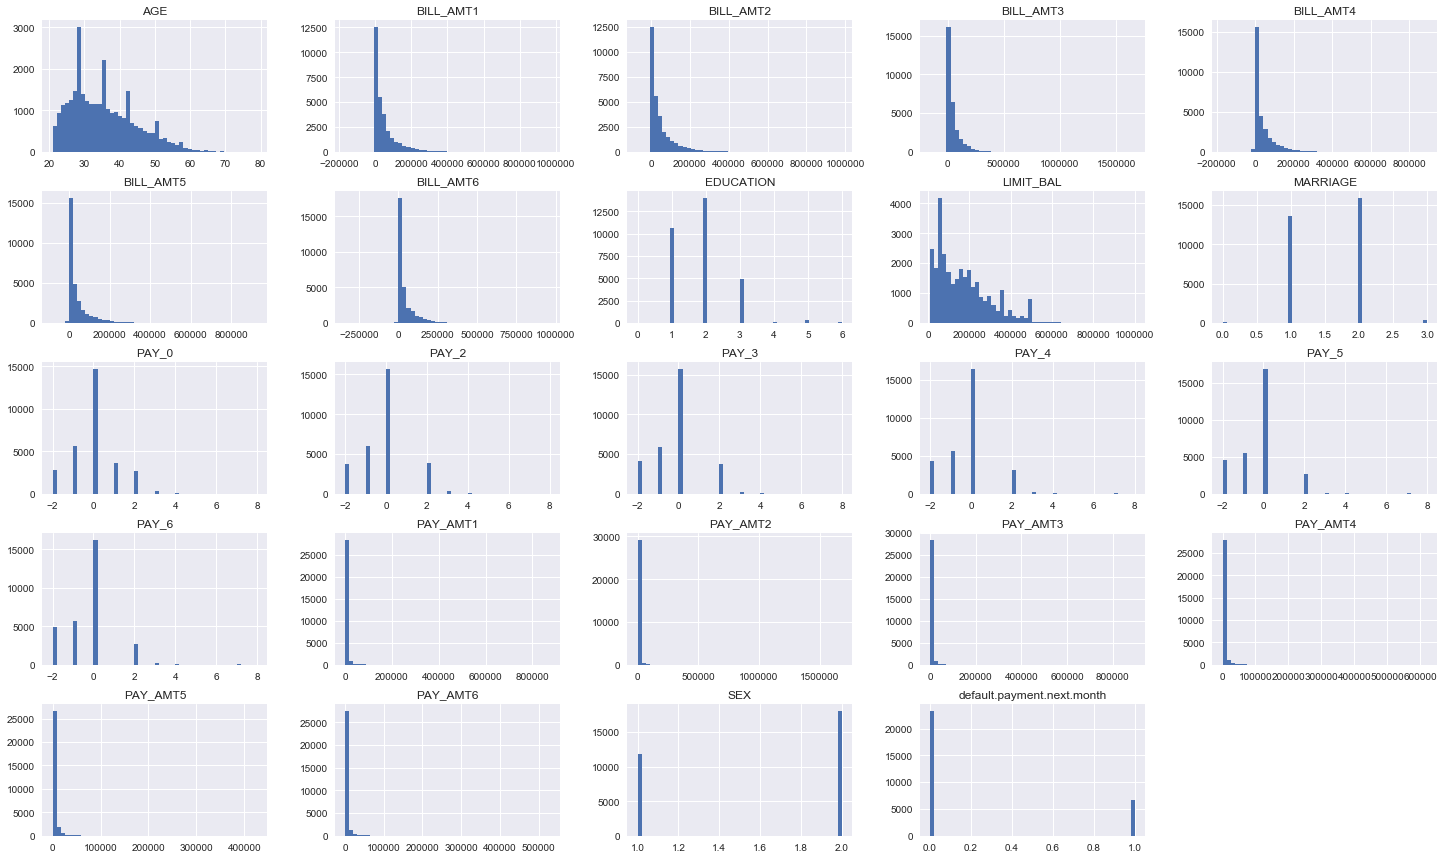

In [93]:
credit.hist(bins = 50, figsize = (25,15))
plt.show();

### Pearson Correlation Heatmap

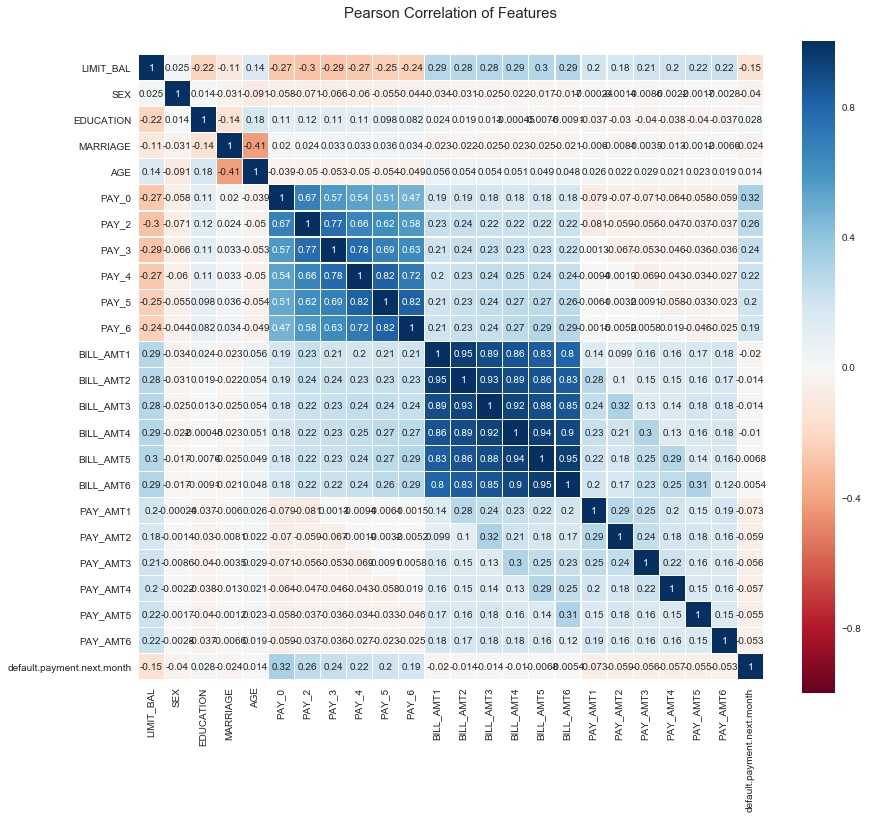

In [94]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(credit.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

##### The correlation heatmap shows that there is not much correlation between the data points

In [95]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(credit, test_size=0.2, random_state=42)

In [96]:
credit = train_set.copy()
corr_matrix = credit.corr()
corr_matrix["LIMIT_BAL"].sort_values(ascending=False)

LIMIT_BAL                     1.000000
BILL_AMT5                     0.295307
BILL_AMT4                     0.292581
BILL_AMT6                     0.290745
BILL_AMT1                     0.283519
BILL_AMT3                     0.281470
BILL_AMT2                     0.277148
PAY_AMT6                      0.223813
PAY_AMT5                      0.218756
PAY_AMT3                      0.209060
PAY_AMT4                      0.202258
PAY_AMT1                      0.195353
PAY_AMT2                      0.171262
AGE                           0.149027
SEX                           0.022468
MARRIAGE                     -0.109410
default.payment.next.month   -0.154328
EDUCATION                    -0.222694
PAY_6                        -0.235134
PAY_5                        -0.248837
PAY_4                        -0.268756
PAY_0                        -0.268788
PAY_3                        -0.285663
PAY_2                        -0.297163
Name: LIMIT_BAL, dtype: float64

In [97]:
credit = pd.DataFrame(credit, columns = credit.columns)

#### Now to check the percentage of defaulters in th etraining set

In [98]:
c= 0
for i in credit["default.payment.next.month"]:
    if i:
        c+=1
print(c/len(credit)*100)    

22.179166666666667


## Constructing a one stop function for measuring model accuracy

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import roc_auc_score

def find_model_perf(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    Y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(Y_test, Y_hat)
    return auc

def classification_model(model, data, outcome, PrintFeatureImportance = True):
    #Fit the model:
    model.fit(data,outcome)
  
    #Make predictions on training set:
    predictions = model.predict(data)
  
    #Print accuracy
    #accuracy = metrics.accuracy_score(predictions,outcome)
    #print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=10)
    error = []
    auc_error = []
    for train, test in kf:
    # Filter training data
        train_predictors = (data.iloc[train,:])
    
    # The target we're using to train the algorithm.
        train_target = outcome.iloc[train]
    
    # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
        error.append(model.score(data.iloc[test,:], outcome.iloc[test]))
        auc_error.append(find_model_perf(model, data.iloc[train,:], outcome.iloc[train], data.iloc[test,:], outcome.iloc[test]))
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    print ("AUC ROC : %s" % "{0:.3%}".format(np.mean(auc_error)))
    model.fit(data, outcome)
    if PrintFeatureImportance:
        feat_imp = pd.Series(model.feature_importances_, [x for x in data.columns]).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [125]:
y = credit["default.payment.next.month"]
X = credit.drop("default.payment.next.month", axis =1)

In [101]:
from sklearn.linear_model import SGDClassifier
X.shape

(24000, 23)

In [67]:
from itertools import combinations
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pd.DataFrame(pca.fit_transform(X))
print(pca.explained_variance_ratio_)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dimension= np.argmax(cumsum>=0.95)+1
print("The optimal no. of dimensions are: "+ str(dimension))
X_pca = X_pca.loc[:,0:3]
print(X_pca)

[6.08151975e-01 2.91971880e-01 3.12200302e-02 1.97014394e-02
 1.04946562e-02 9.62128226e-03 7.35483298e-03 6.75309192e-03
 5.81387056e-03 3.15562306e-03 2.49045415e-03 1.73398654e-03
 1.53687626e-03 1.82639639e-09 9.33261506e-11 1.91224379e-11
 1.23999566e-11 1.15577364e-11 7.72474204e-12 5.67574166e-12
 5.29249763e-12 4.60491087e-12 3.84674838e-12]
The optimal no. of dimensions are: 4
                   0              1              2             3
0      -40466.892106 -101196.154455   -8654.697518   2062.879891
1      545548.025592 -169128.522547  -19346.043644  -3571.119210
2      -35343.756075  160216.028444   -3580.155009  -5057.470042
3      127024.922444   84618.865556  134572.922021  92326.495687
4      251927.345816  -95834.033408  -80812.625372  25559.273877
5      -80432.523165   82463.462715   -1203.435557  -3324.701823
6      188759.356857  -81012.070649   33910.367758 -15738.761271
7      174532.879951  -96716.912787   -1790.871125  -3185.730830
8     -108632.226961   296

###### Single Regression Models

In [68]:
model = LogisticRegression()
classification_model(model, X, y, PrintFeatureImportance = False)

Cross-Validation Score : 77.865%
AUC ROC : 63.920%


In [69]:
model = LogisticRegression()
classification_model(model, X_pca, y, PrintFeatureImportance = False)

Cross-Validation Score : 77.875%
AUC ROC : 62.793%


In [70]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
classification_model(model, X, y,PrintFeatureImportance = False)

Cross-Validation Score : 37.703%
AUC ROC : 66.703%


In [71]:
model = GaussianNB()
classification_model(model, X_pca, y, PrintFeatureImportance = False)

Cross-Validation Score : 75.312%
AUC ROC : 62.042%


##### We can clearly see that PCA features the cv score but decreases th AUC ROC score

###### Using Ensembles

In [72]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(DecisionTreeClassifier(), bootstrap = True, n_jobs = -1)
classification_model(model, X, y, PrintFeatureImportance = False)

Cross-Validation Score : 80.688%
AUC ROC : 72.881%


Cross-Validation Score : 82.240%
AUC ROC : 78.087%


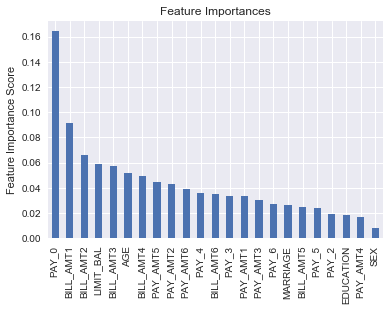

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

model= GradientBoostingClassifier(random_state=10)
GradientBoostingClassifier
classification_model(model, X, y)

#### All the features have relatively significant importance

Parameter tuning for GradientBoostingClassifier

In [76]:
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X,y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.78126, std: 0.00439, params: {'n_estimators': 20},
  mean: 0.78275, std: 0.00443, params: {'n_estimators': 30},
  mean: 0.78338, std: 0.00396, params: {'n_estimators': 40},
  mean: 0.78348, std: 0.00391, params: {'n_estimators': 50},
  mean: 0.78310, std: 0.00333, params: {'n_estimators': 60},
  mean: 0.78272, std: 0.00326, params: {'n_estimators': 70},
  mean: 0.78207, std: 0.00343, params: {'n_estimators': 80}],
 {'n_estimators': 50},
 0.7834848840187041)

In [77]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X,y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.78125, std: 0.00513, params: {'max_depth': 5, 'min_samples_split': 200},
  mean: 0.78294, std: 0.00469, params: {'max_depth': 5, 'min_samples_split': 400},
  mean: 0.78281, std: 0.00408, params: {'max_depth': 5, 'min_samples_split': 600},
  mean: 0.78260, std: 0.00421, params: {'max_depth': 5, 'min_samples_split': 800},
  mean: 0.78328, std: 0.00378, params: {'max_depth': 5, 'min_samples_split': 1000},
  mean: 0.78231, std: 0.00584, params: {'max_depth': 7, 'min_samples_split': 200},
  mean: 0.78318, std: 0.00558, params: {'max_depth': 7, 'min_samples_split': 400},
  mean: 0.78270, std: 0.00476, params: {'max_depth': 7, 'min_samples_split': 600},
  mean: 0.78438, std: 0.00459, params: {'max_depth': 7, 'min_samples_split': 800},
  mean: 0.78371, std: 0.00450, params: {'max_depth': 7, 'min_samples_split': 1000},
  mean: 0.78086, std: 0.00695, params: {'max_depth': 9, 'min_samples_split': 200},
  mean: 0.78363, std: 0.00487, params: {'max_depth': 9, 'min_samples_split': 400},
  

###### min_sample_split=1000 is an extreme value but max_depth = 7 seems reasonable enough

In [43]:
param_test3 = {'min_samples_split':range(200,1001,200),'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50,max_depth=7,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X,y)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.78351, std: 0.00761, params: {'min_samples_leaf': 30, 'min_samples_split': 1000},
  mean: 0.78306, std: 0.00619, params: {'min_samples_leaf': 30, 'min_samples_split': 1200},
  mean: 0.78384, std: 0.00631, params: {'min_samples_leaf': 30, 'min_samples_split': 1400},
  mean: 0.78264, std: 0.00717, params: {'min_samples_leaf': 30, 'min_samples_split': 1600},
  mean: 0.78315, std: 0.00629, params: {'min_samples_leaf': 30, 'min_samples_split': 1800},
  mean: 0.78285, std: 0.00585, params: {'min_samples_leaf': 30, 'min_samples_split': 2000},
  mean: 0.78382, std: 0.00684, params: {'min_samples_leaf': 40, 'min_samples_split': 1000},
  mean: 0.78342, std: 0.00699, params: {'min_samples_leaf': 40, 'min_samples_split': 1200},
  mean: 0.78327, std: 0.00653, params: {'min_samples_leaf': 40, 'min_samples_split': 1400},
  mean: 0.78338, std: 0.00686, params: {'min_samples_leaf': 40, 'min_samples_split': 1600},
  mean: 0.78330, std: 0.00727, params: {'min_samples_leaf': 40, 'min_samples_spl

Cross-Validation Score : 82.172%
AUC ROC : 78.528%


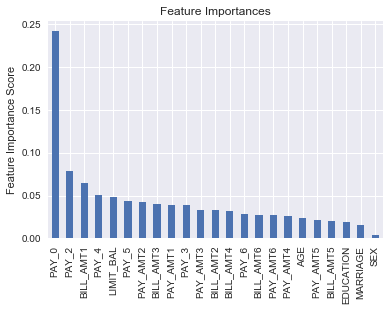

In [78]:
classification_model(gsearch3.best_estimator_, X, y)

In [80]:
param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, max_depth=7, min_samples_split=1200, min_samples_leaf=50, subsample=0.8,  random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X,y)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.78498, std: 0.00446, params: {'max_features': 7},
  mean: 0.78507, std: 0.00607, params: {'max_features': 9},
  mean: 0.78631, std: 0.00501, params: {'max_features': 11},
  mean: 0.78546, std: 0.00601, params: {'max_features': 13},
  mean: 0.78448, std: 0.00515, params: {'max_features': 15},
  mean: 0.78473, std: 0.00531, params: {'max_features': 17},
  mean: 0.78463, std: 0.00508, params: {'max_features': 19}],
 {'max_features': 11},
 0.7863091601551215)

#### Estimation using GBClassifier with tuned hyperparameter

Cross-Validation Score : 82.147%
AUC ROC : 78.360%


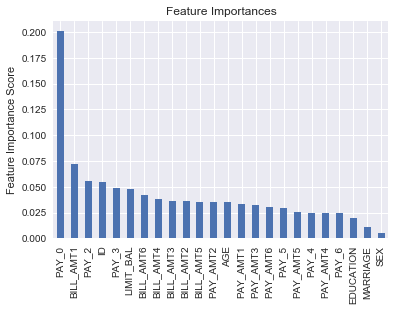

In [126]:
classification_model(GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, max_depth=7, min_samples_split=1200, min_samples_leaf=50, subsample=0.8,  random_state=10, max_features = 11), X, y)

#### Classifying using XGBoost!!!!

Cross-Validation Score : 81.296%
AUC ROC : 75.725%


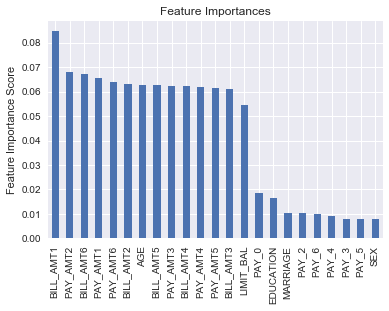

In [105]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.3.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
import xgboost as xgb
#Choose all predictors except target & IDcols
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
classification_model(xgb1, X, y)

###### Parameter Tuning of XGBoost ensembel model

In [106]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X,y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.78060, std: 0.00558, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.78077, std: 0.00556, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.78084, std: 0.00535, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.77992, std: 0.00481, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.77918, std: 0.00384, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.77860, std: 0.00490, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.77412, std: 0.00515, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.77367, std: 0.00458, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.77481, std: 0.00564, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.76907, std: 0.00632, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.76921, std: 0.00572, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.77127, std: 0.00639, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 3, 'min_child_weight': 5

In [109]:
param_test2 = {
 'max_depth':[1,2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=3,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X,y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.77368, std: 0.00779, params: {'max_depth': 1, 'min_child_weight': 4},
  mean: 0.77388, std: 0.00782, params: {'max_depth': 1, 'min_child_weight': 5},
  mean: 0.77361, std: 0.00762, params: {'max_depth': 1, 'min_child_weight': 6},
  mean: 0.77965, std: 0.00604, params: {'max_depth': 2, 'min_child_weight': 4},
  mean: 0.77999, std: 0.00618, params: {'max_depth': 2, 'min_child_weight': 5},
  mean: 0.78015, std: 0.00639, params: {'max_depth': 2, 'min_child_weight': 6},
  mean: 0.78065, std: 0.00537, params: {'max_depth': 3, 'min_child_weight': 4},
  mean: 0.78084, std: 0.00535, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.78031, std: 0.00471, params: {'max_depth': 3, 'min_child_weight': 6},
  mean: 0.78085, std: 0.00612, params: {'max_depth': 4, 'min_child_weight': 4},
  mean: 0.78075, std: 0.00565, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: 0.78159, std: 0.00573, params: {'max_depth': 4, 'min_child_weight': 6}],
 {'max_depth': 4, 'min_child_weight': 6

In [113]:
param_test2b = {
 'min_child_weight':[6,8,10,12,13,14]
}
gsearch2b = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2b.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=6, missing=None, n_estimators=140,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_child_weight': [6, 8, 10, 12, 13, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

Cross-Validation Score : 82.163%
AUC ROC : 78.383%


([mean: 0.78159, std: 0.00573, params: {'min_child_weight': 6},
  mean: 0.78049, std: 0.00547, params: {'min_child_weight': 8},
  mean: 0.78176, std: 0.00586, params: {'min_child_weight': 10},
  mean: 0.78239, std: 0.00522, params: {'min_child_weight': 12},
  mean: 0.78192, std: 0.00553, params: {'min_child_weight': 13},
  mean: 0.78171, std: 0.00508, params: {'min_child_weight': 14}],
 {'min_child_weight': 12},
 0.7823896018558623)

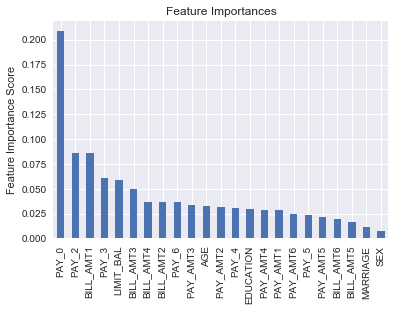

In [114]:
classification_model(gsearch3.best_estimator_, X, y)
gsearch2b.grid_scores_, gsearch2b.best_params_, gsearch2b.best_score_

###### Tuning Gamma Parameter

In [117]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,9)]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=12, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X,y)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.78239, std: 0.00522, params: {'gamma': 0.0},
  mean: 0.78249, std: 0.00506, params: {'gamma': 0.1},
  mean: 0.78249, std: 0.00506, params: {'gamma': 0.2},
  mean: 0.78268, std: 0.00518, params: {'gamma': 0.3},
  mean: 0.78294, std: 0.00544, params: {'gamma': 0.4},
  mean: 0.78286, std: 0.00538, params: {'gamma': 0.5},
  mean: 0.78175, std: 0.00491, params: {'gamma': 0.6},
  mean: 0.78197, std: 0.00447, params: {'gamma': 0.7},
  mean: 0.78232, std: 0.00503, params: {'gamma': 0.8}],
 {'gamma': 0.4},
 0.7829367964359262)

Cross-Validation Score : 82.117%
AUC ROC : 78.252%


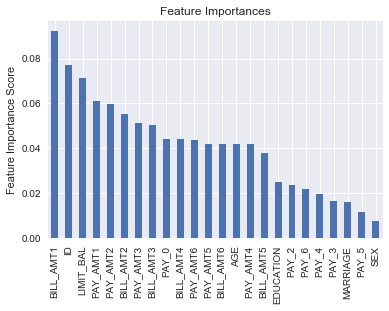

In [127]:
classification_model(gsearch3.best_estimator_, X, y)

In [119]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.3.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
import xgboost as xgb
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np

clf1 = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=12, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)
clf2 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, max_depth=7, min_samples_split=1200, min_samples_leaf=50, subsample=0.8,  random_state=10, max_features=11)
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2], 
                          meta_classifier=lr)
for clf, label in zip([clf1, clf2, sclf], 
                      ['XGBoost', 
                       'GradientBoosting', 
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.82 (+/- 0.00) [XGBoost]
Accuracy: 0.82 (+/- 0.00) [GradientBoosting]
Accuracy: 0.82 (+/- 0.00) [StackingClassifier]


In [120]:
classification_model(sclf, X, y, PrintFeatureImportance = False)

Cross-Validation Score : 82.100%
AUC ROC : 66.657%


AttributeError: 'StackingClassifier' object has no attribute 'feature_importances_'